<a href="https://colab.research.google.com/github/dragoa/AI/blob/main/ML/02/crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Took the dataset from http://archive.ics.uci.edu/dataset/183/communities+and+crime

In [94]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from pandas import read_csv

In [95]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
data_folder = '/content/drive/MyDrive/Colab Notebooks/ML/02/'

In [97]:
# Read data from file
data = read_csv(data_folder + "crime.csv", header=0)

# Drop all the columns that are non predictive
data = data.drop(columns=['state','county','community','communityname','fold'], axis=1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [98]:
# Remove the missing values
data = data.replace('?', np.nan) # replacing ? with NaN

In [99]:
# features that contain missing values
feature_missing = data.columns[data.isnull().any()]
print(data.shape)
print(feature_missing)
print(feature_missing.shape) # 23 cols with at least a NaN value

(1994, 123)
Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(23,)


In [100]:
# Print this cols
data[feature_missing].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,...,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,1993,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,...,50,72,30,15,77,63,38,72,3,51
top,0,0.02,0.1,0.98,0.19,0.02,0.14,0.23,0.1,0.78,...,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,129,80,19,81,17,55,23,15,19,12,...,189,14,48,54,12,27,69,13,126,22


In [101]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy="mean")
# Apply the imputer on the column that has missing values, substituted by the mean
data[['OtherPerCap']] = imp.fit_transform(data[['OtherPerCap']])

# Drop all the other columns with NaN
data = data.dropna(axis=1)
data.shape

(1994, 101)

In [102]:
# The last column is the one to predict, the other are the features
data.columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85',
       'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'LemasPctOfficDrugUn', 'ViolentCrimesPerPop'],
      dtype='object', length=101)

In [103]:
# I need to create matrix X and y
# I extract all the values of all the rows of all the columns from 0 to 100 (elements start from 0)
X = data.iloc[:,0:100].values
y = data.iloc[:,100].values

print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(1994, 100)
<class 'numpy.ndarray'>
(1994,)
<class 'numpy.ndarray'>


In [104]:
# I need also to normalize the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scal = MinMaxScaler()
X = scal.fit_transform(X)

print(X.shape)
print(type(X))

(1994, 100)
<class 'numpy.ndarray'>


(array([ 55.,  32.,  52.,  78.,  92., 144., 183., 199., 368., 791.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

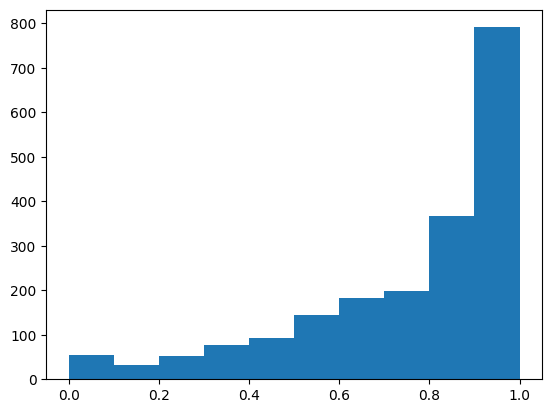

In [105]:
# Outliers
plt.hist(X[:,3])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split

"""
We want to find which are the best hyperparameters. We use the model selecrion library
"""

ytt = np.asarray([]) # All the true values
ypp = np.asarray([]) # All the predictions

for i in range(0,10):
  # Xlv, ylv for learning and validation, Xt, yt for testing
  Xlv, Xt, ylv, yt = train_test_split(X, y, test_size=.1)

  # grid of values that we are searching
  grid = {'alpha'  : np.logspace(-4,3,10),
          'kernel' : ['rbf'],
          'gamma'  : np.logspace(-4,3,10)}

  # what we want to minimize
  MS = GridSearchCV(estimator = KernelRidge(),
                    param_grid = grid,
                    scoring = 'neg_mean_absolute_error',
                    cv = 10,
                    verbose = 2)

  # I apply the model selection on my data
  H = MS.fit(Xlv,ylv)
  # I put the best hyperparameters that I found
  M = KernelRidge(alpha = H.best_params_['alpha'],
                  kernel = H.best_params_['kernel'],
                  gamma = H.best_params_['gamma'])
  # I retrain my model
  M.fit(Xlv,ylv)
  # Final prediction
  yp = M.predict(Xt)

  ytt = np.concatenate((ytt,yt),axis=0)
  ypp = np.concatenate((ypp,yp),axis=0)
  print(ytt.shape)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.3s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.3s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.3s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.3s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END alpha=0.0001, gamma=0.0005994842503189409, kernel=rbf; total time=   0.2s
[CV] END alpha=0.0001, gamma=0.00059948425

In [ ]:
np.mean(np.abs(ytt-ypp))

In [ ]:
# Scatter plot
fig, ax = plt.subplots()
ax.plot(ytt,ypp,'bo')
ax.plot([0,1],[0,1],'r')